# Clash Tests Analysis
## By (Group 07)

## Dataset Overview

- Our dataset consists of all the clash tests, exported from Navisworks, to perform clash detection and eliminate contradictions between disciplines in the project.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
df.head()

,test,total_clashes,round_1,round_2,round_3,round_4
id,,,,,,
1,001 - AR Walls - AR Walls,42,41,33,36,34
2,002 - AR Walls - AR Windows-Doors,14,8,8,8,8
3,003 - AR Walls - AR Floors,107,68,66,70,67
4,004 - AR Walls - AR Roofs,0,0,0,0,0
5,005 - AR Walls - AR Stairs,0,0,0,0,0


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clashes.csv')
# setting id column as index 
df.set_index('id', inplace = True)

# rename columns to be easily manipulated
df.rename(columns= {'name3':'test','total':'total_clashes','Round 1':'round_1','Round 2':'round_2','Round 3':'round_3','Round 4':'round_4'}, inplace=True)

# eliminate all zero values
df1= df[df.total_clashes > 0]
df1.describe()
df1.head()

# split test column to three columns(test_number, discipline_1, discipline_2)
clash_tests = df1['test'].str.split(' - ', expand=True)
clash_tests[0] = pd.to_numeric(clash_tests[0])

# merge the new columns with df1
df1= pd.merge(clash_tests, df1, left_index=True, right_index=True )
df1.rename(columns= {0:'test_number', 1:'discipline_1', 2:'discipline_2'}, inplace = True)
df1.drop('test_number', axis= 1, inplace= True)
df1.head()

,discipline_1,discipline_2,test,total_clashes,round_1,round_2,round_3,round_4
id,,,,,,,,
1,AR Walls,AR Walls,001 - AR Walls - AR Walls,42,41,33,36,34
2,AR Walls,AR Windows-Doors,002 - AR Walls - AR Windows-Doors,14,8,8,8,8
3,AR Walls,AR Floors,003 - AR Walls - AR Floors,107,68,66,70,67
6,AR Walls,AR Railings,006 - AR Walls - AR Railings,6,0,0,0,0
7,AR Walls,STR Columns,007 - AR Walls - STR Columns,22,22,4,4,3


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Total Clashes by Discipline

- AR clashes takes the lead with 44%, followed by STR clashes (34%), ME clashes (18%), and El clashes (almost 5%)



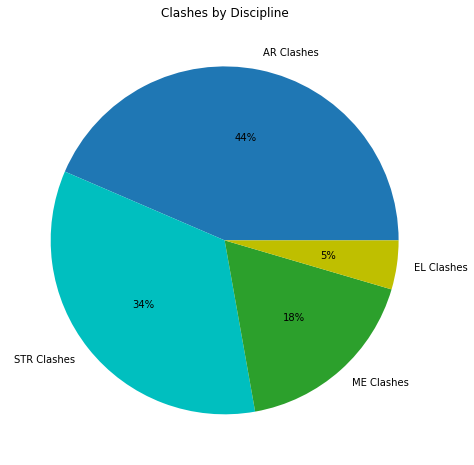

In [10]:
# total clashes by discipline.
ar_all = df1.loc[df1['discipline_1'].str.contains('AR ') | df1['discipline_2'].str.contains('AR ')].total_clashes.sum()
str_all = df1.loc[df1['discipline_1'].str.contains('STR ') | df1['discipline_2'].str.contains('STR ')].total_clashes.sum()
me_all = df1.loc[df1['discipline_1'].str.contains('ME ') | df1['discipline_2'].str.contains('ME ')].total_clashes.sum()
el_all = df1.loc[df1['discipline_1'].str.contains('EL ') | df1['discipline_2'].str.contains('EL ')].total_clashes.sum()

# create a list containing disciplines clashes
discipline_clashes = [ar_all, str_all, me_all, el_all]

# Pie Chart to show total clashes by discipline
plt.figure(figsize=[8,8])
plt.pie(discipline_clashes, labels=['AR Clashes','STR Clashes', 'ME Clashes','EL Clashes'], autopct='%1.0f%%', colors=['tab:blue', 'c', 'tab:green', 'y'])
plt.title('Clashes by Discipline');

## Total Clashes Over the Four Rounds (Phase 1)

- By the end of phase 1 (over four rounds), almost 50% of the issues were eliminated by the team. Most of these clashes were between same discipline


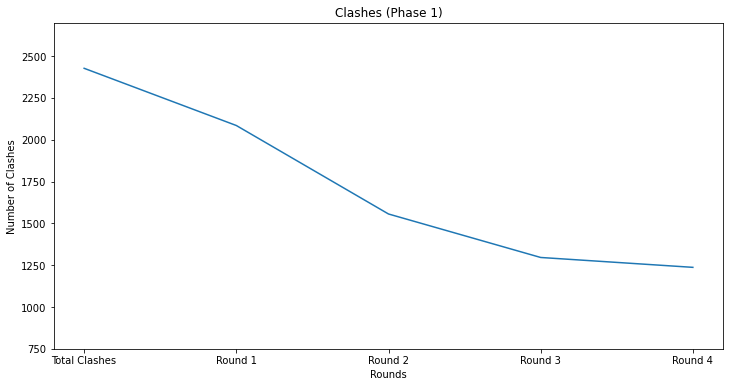

In [4]:
# plot clashes over the 4 rounds (Phase 1)
plt.figure(figsize = [12, 6])
y= df1.sum(numeric_only = True)
x=['Total Clashes', 'Round 1', 'Round 2', 'Round 3', 'Round 4']
s= sb.lineplot(x=x, y=y, color = sb.color_palette()[0])

plt.ylim(750,2700)
plt.xlabel('Rounds');
plt.ylabel('Number of Clashes');
plt.title('Clashes (Phase 1)');

## Clashes Between Same Discipline (Combined)

- STR, ME, El discipline were doing fine through over the rounds. AR discipline started with higher clashes that needed further investigation.



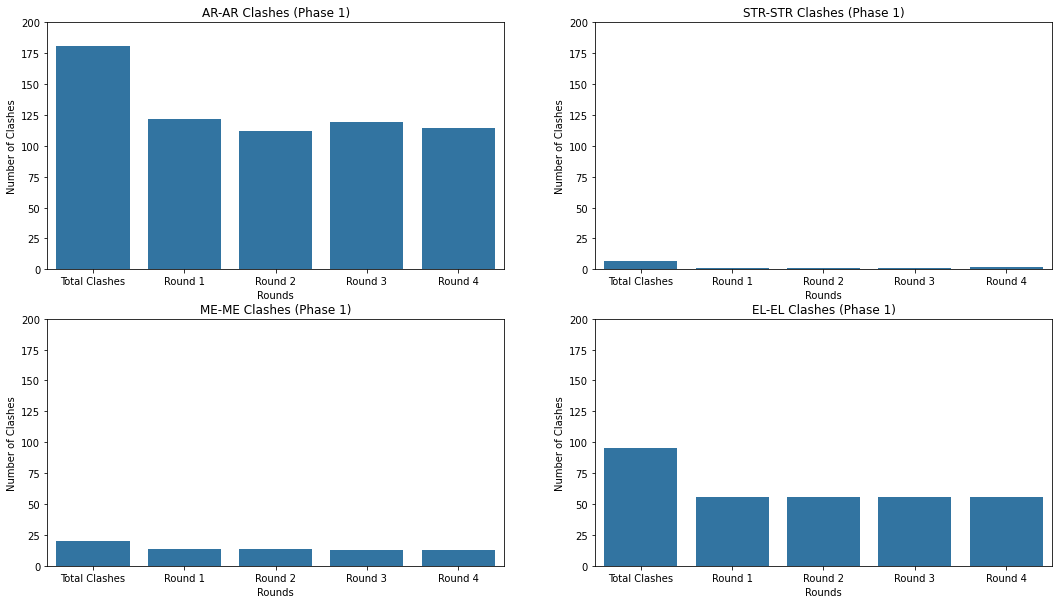

In [5]:
# clashes between same discipline (combined)
ar_ar = df1.groupby(df1['discipline_1'].str.contains('AR ') & df1['discipline_2'].str.contains('AR ')).sum().values[1]
str_str = df1.groupby(df1['discipline_1'].str.contains('STR ') & df1['discipline_2'].str.contains('STR ')).sum().values[1]
me_me = df1.groupby(df1['discipline_1'].str.contains('ME ') & df1['discipline_2'].str.contains('ME ')).sum().values[1]
el_el = df1.groupby(df1['discipline_1'].str.contains('EL ') & df1['discipline_2'].str.contains('EL ')).sum().values[1]

# Plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = [18, 10])
fig.figsize=[6,3]

# AR-AR (Combined)
s= sb.barplot(x=x, y=ar_ar, color = sb.color_palette()[0], ax = axes[0,0])

axes[0,0].set_ylim(0,200)
axes[0,0].set_xlabel('Rounds');
axes[0,0].set_ylabel('Number of Clashes');
axes[0,0].set_title('AR-AR Clashes (Phase 1)');

# STR-STR (Combined)
s= sb.barplot(x=x, y=str_str, color = sb.color_palette()[0], ax = axes[0,1])

axes[0,1].set_ylim(0,200)
axes[0,1].set_xlabel('Rounds');
axes[0,1].set_ylabel('Number of Clashes');
axes[0,1].set_title('STR-STR Clashes (Phase 1)');

# ME-ME (Combined)
s= sb.barplot(x=x, y=me_me, color = sb.color_palette()[0], ax = axes[1,0])

axes[1,0].set_ylim(0,200)
axes[1,0].set_xlabel('Rounds');
axes[1,0].set_ylabel('Number of Clashes');
axes[1,0].set_title('ME-ME Clashes (Phase 1)');

# EL-EL (Combined)
s= sb.barplot(x=x, y=el_el, color = sb.color_palette()[0], ax = axes[1,1])

axes[1,1].set_ylim(0,200)
axes[1,1].set_xlabel('Rounds');
axes[1,1].set_ylabel('Number of Clashes');
axes[1,1].set_title('EL-EL Clashes (Phase 1)');

## AR Walls Clashes as % of the total

- AR Walls clashes were almost 80 % of the total clashes.



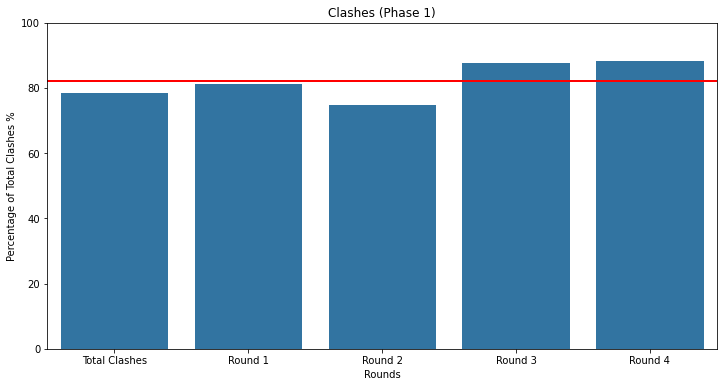

In [6]:
## AR Walls Clashes as % of the total
ar_wall = df1.loc[df1['discipline_1'].str.contains('AR Wall') | df1['discipline_2'].str.contains('AR Wall')]
ar_wall_mean= ar_wall.sum(numeric_only = True)/df.sum(numeric_only = True)

plt.figure(figsize = [12, 6])
y= ar_wall_mean*100
x=['Total Clashes', 'Round 1', 'Round 2', 'Round 3', 'Round 4']
s= sb.barplot(x=x, y=y, color = sb.color_palette()[0])

plt.ylim(0,100)
plt.xlabel('Rounds');
plt.ylabel('Percentage of Total Clashes %');
plt.title('Clashes (Phase 1)');
# Plotting vertical line showing the mean
plt.axhline(y.mean(), color='r', lw=2);

## Insights

#### 1- Most of the clashes are divided between AR & STR disciplines.
#### 2- AR Walls issues represents (75% - 88%) of total clashes.
#### 3- Most of the AR Walls clashes occur due to mistaken wall height.
#### 4- These clashes cause no problem at construction stage, but they have a great impact on the BOQ.
#### 5- Approximately no thing has changed between Round 3 & Round 4, so we are going to start "Phase 2" with new XML files.



>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [11]:
jupyter nbconvert --to slides --no-input clash_tests.ipynb

SyntaxError: invalid syntax (<ipython-input-11-e8a23fb4615a>, line 1)

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 